# Regression using XGBoost

This notebook shows how to use XGBoost for Regression. It uses the Boston housing dataset that we are familiar with and have used a number of times (Recently, in Lab 4).

In [ ]:
from numpy import absolute
from xgboost import XGBRegressor
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = pd.read_csv(url, header=None)
dataframe = dataframe.rename(columns={0:'CRIM', 1:'ZN', 2:'INDUS', 3:'CHAS', 4:'NOX', 5:'RM', 6:'AGE', 7:'DIS',8:'RAD'
                        ,9:'TAX', 10:'PTRATIO', 11:'B', 12:'LSTAT',13:'MEDV'})
# summarize shape
print(dataframe.shape)
# summarize first few lines
print(dataframe.head())

(506, 14)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


We can see that this dataset has 506 rows, 13 input variables and one output variable, and all the input variables are numeric.

The XGBoost library has its own custom API, although we will use the method via the scikit-learn wrapper classes: XGBRegressor and XGBClassifier. This will allow us to use the full suite of tools from the scikit-learn machine learning library to prepare data and evaluate models.

An XGBoost regression model can be defined by creating an instance of the XGBRegressor class; for example:

In [ ]:
# create an xgboost regression model
model = XGBRegressor()

You can specify hyperparameter values to the class constructor to configure the model.

Perhaps the most commonly configured hyperparameters are the following:

    n_estimators: The number of trees in the ensemble, often increased until no further improvements are seen.
    max_depth: The maximum depth of each tree, often values are between 1 and 10.
    eta: The learning rate used to weight each model, often set to small values such as 0.3, 0.1, 0.01, or smaller.
    subsample: The number of samples (rows) used in each tree, set to a value between 0 and 1, often 1.0 to use all samples.
    colsample_bytree: Number of features (columns) used in each tree, set to a value between 0 and 1, often 1.0 to use all features.



Good hyperparameter values can be found by trial and error for a given dataset, or systematic experimentation such as using a cross validation across a range of values.

Randomness is used in the construction of the model. This means that each time the algorithm is run on the same data, it may produce a slightly different model.

Next, let’s evaluate a regression XGBoost model with default hyperparameters on the problem.

First, we can split the loaded dataset into input and output columns for training and evaluating a predictive model.

In [ ]:
# split data into input and output columns
data = dataframe.values
X, y = data[:, :-1], data[:, -1]

We now split the data into the train and test datasets using `train_test_split`

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Next, we can create an instance of the model with a default configuration.

In [ ]:
# define model
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [ ]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

We will evaluate the model using the best practice of repeated k-fold cross-validation with 3 repeats and 10 folds.

This can be achieved by using the RepeatedKFold class to configure the evaluation procedure and calling the cross_val_score() to evaluate the model using the procedure and collect the scores.

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

Once evaluated, we can report the estimated performance of the model when used to make predictions on new data for this problem.

In this case, because the scores were made negative, we can use the absolute() NumPy function to make the scores positive.

In [ ]:
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

Running this example evaluates the XGBoost Regression algorithm on the housing dataset and reports the average MAE across the three repeats of 10-fold cross-validation.

In [ ]:
scores = absolute(scores)
print('Mean MSE: %.3f' % scores.mean())

Mean MSE: 9.232


We can predict the values using this model.

In [ ]:
y_pred = model.predict(X_test)

Checking the R2 score:

In [ ]:
print('r-squared: %.2f' % r2_score(y_test, y_pred))

r-squared: 0.93


In [ ]:
compare = pd.DataFrame(y_test[:10], columns=['Test'])
compare['Predicted'] = y_pred[:10]
print(compare.head(10))

   Test  Predicted
0  21.0  21.626291
1  19.7  21.240723
2  22.3  22.661037
3  34.9  34.701397
4  16.0  18.673351
5  50.0  45.747601
6  16.8  18.900492
7  13.9  12.921618
8  17.4  17.154655
9   8.3   8.786676


Plotting the scatter plots for the Test and Predicted Values, where the Red points are the Test values, and the Blue points are the Predicted values.

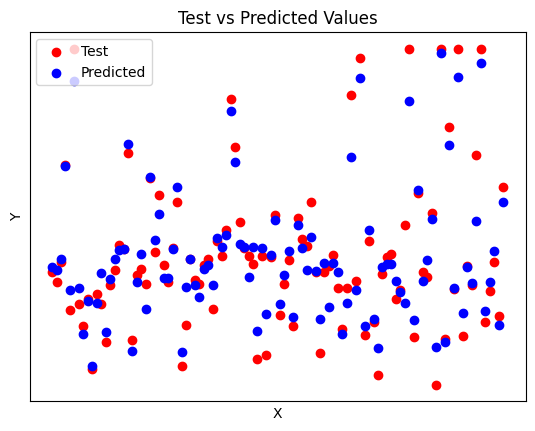

In [ ]:
#Actual Values
plt.scatter(range(0,len(X_test)), y_test,  color='red')
#Predicted Values
plt.scatter(range(0,len(X_test)), y_pred, color='blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.xticks(())
plt.yticks(())
plt.title("Test vs Predicted Values")
plt.legend(['Test','Predicted'],loc="upper left")
plt.show()

Thus, we can see how the XGBoost library can be used to solve regression problems, which gets us a higher level of accuracy for the model.